# Color Threshold, Green Screen

### Import resources

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [7]:
# Read in the image
image = mpimg.imread('images/car_green_screen.jpg')
image_hsv = cv2.cvtColor(np.copy(image), cv2.COLOR_RGB2HSV)
# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)


Image dimensions: (450, 660, 3)


61


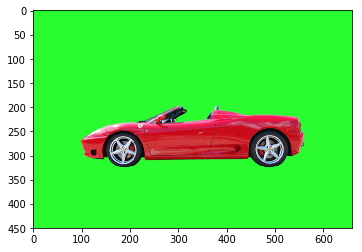

In [10]:
# Display the image
plt.imshow(image)

### Define the color threshold

In [20]:
## TODO: Define our color selection boundaries in RGB values
lower_green = np.array([45, 0, 0]) 
upper_green = np.array([75,255, 255])


### Create a mask

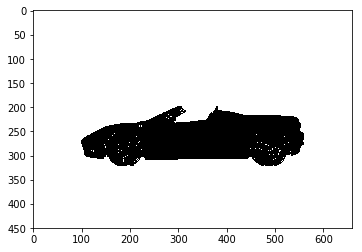

In [21]:
# Define the masked area
mask = cv2.inRange(image_hsv, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

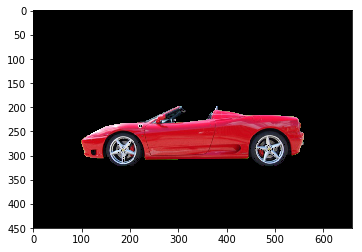

In [22]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)


### Mask and add a background image

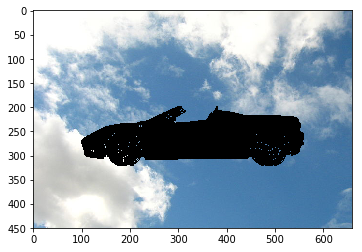

In [23]:
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('images/sky.jpg')

## TODO: Crop it or resize the background to be the right size (450x660)
background_image = background_image[0:masked_image.shape[0], 0:masked_image.shape[1]]

## TODO: Mask the cropped background so that the pizza area is blocked
# Hint mask the opposite area of the previous image
masked_background = np.copy(background_image)
masked_background[mask == 0] = [0, 0, 0]


## TODO: Display the background and make sure 
plt.imshow(masked_background)

### Create a complete image

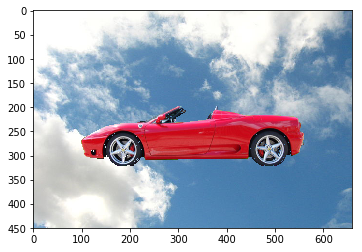

In [24]:
## TODO: Add the two images together to create a complete image!
complete_image = masked_image + masked_background

# TODO: Display the result
plt.imshow(complete_image)



## Solutions for TODOs

#### Define our color selection boundaries in RGB values
lower_green = np.array([0,240,0]) 

#### Load in a background image, and convert it to RGB 
background_image = mpimg.imread('<file_name>')
background_image = mpimg.cvtColor(background_image, cv2.COLOR_BGR2RGB)

#### Crop it to the right size (450x660)
crop_background = background_image[0:450, 0:660]

#### Mask the cropped background so that the image area is blocked
crop_background[mask == 0] = [0, 0, 0]

#### Display the background
plt.imshow(crop_background)

#### Add the two images together to create a complete image!
complete_image = masked_image + crop_background

#### Display the result
plt.imshow(complete_image)